In [19]:
import numpy as np

import sys
sys.path.append('..')  # This moves one directory up

from neural_network.network import Network
from neural_network.layers import Dense
from neural_network.cost import Cost
from neural_network.optimizer import Optimizer

In [20]:
num_features = 5
num_examples = 100

input_size = num_features
output_size = 1

X = np.random.random((num_features, num_examples))
Y = X.sum(axis=0) + 0.5

In [21]:
layer1 = Dense(input_size, 5, "relu")
layer2 = Dense(5, output_size, "none")

cost = Cost("MSE")
optimizer = Optimizer("none", 10)

In [22]:
network = Network([layer1, layer2], optimizer, cost)

cache = network.forward_prop(X,Y)

In [23]:
network.train(X, Y, 2000, learning_rate=0.01, debug=False)

cache_2 = network.forward_prop(X,Y)

print(f"Loss before update = {cache['loss']}")
print(f"Loss after update = {cache_2['loss']}")

Loss before update = 10.916216857145951
Loss after update = 0.0005597035880205718


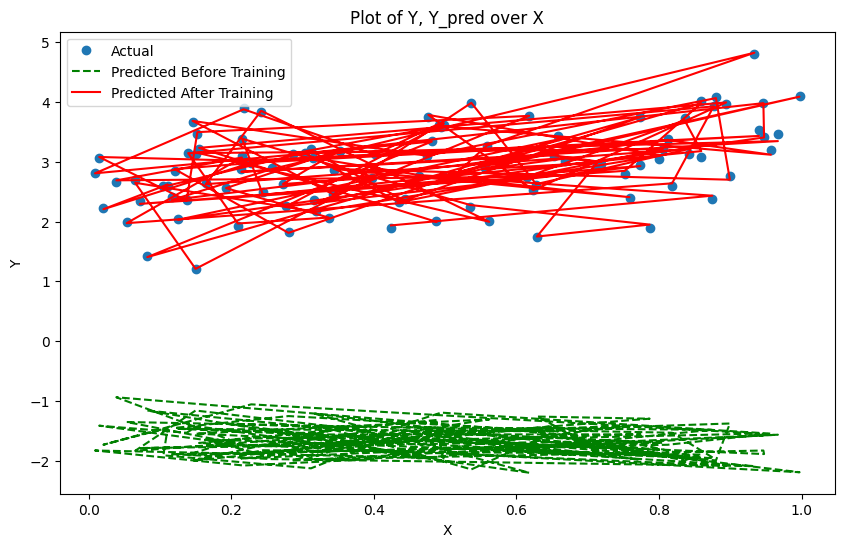

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and Y are 1-D numpy arrays
# Assuming cache_1['Y_hat'] are the predictions before training
# Assuming cache_2['Y_hat'] are the predictions after training

Y_hat_before = np.reshape(cache[f'A_1'], -1)
Y_hat_after = np.reshape(cache_2['A_1'], -1)

plt.figure(figsize=(10, 6))
plt.plot(X[0], Y, 'o', label='Actual')
plt.plot(X[0], Y_hat_before, 'g--', label='Predicted Before Training')
plt.plot(X[0], Y_hat_after, 'r-', label='Predicted After Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Y, Y_pred over X')
plt.legend()
plt.show()